This notebook removes outliers from the data and save the final data to a csv file

In [1]:
import logging
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "svg"
%matplotlib inline

In [2]:
logging.info('Loading data sets')

df_mean = pd.read_csv(r"..\data\mean_features.csv")

logging.info('Loading data sets done.')

## Remove outliers for mean features

In [3]:
df_mean_B = df_mean.loc[df_mean['diagnosis'] == 0]
df_mean_B.drop('Unnamed: 0',axis=1,inplace=True)
df_mean_B = df_mean_B[df_mean_B['radius_mean'] > -1.8]
df_mean_B = df_mean_B[df_mean_B['radius_mean'] < 0.7]

df_mean_M = df_mean.loc[df_mean['diagnosis'] == 1]
df_mean_M.drop('Unnamed: 0',axis=1,inplace=True)
df_mean_M = df_mean_M[df_mean_M['radius_mean'] > -1]
df_mean_M = df_mean_M[df_mean_M['radius_mean'] < 3.3 ]
df_mean_M

df_mean_F = pd.concat([df_mean_B,df_mean_M],axis=0,ignore_index=True)

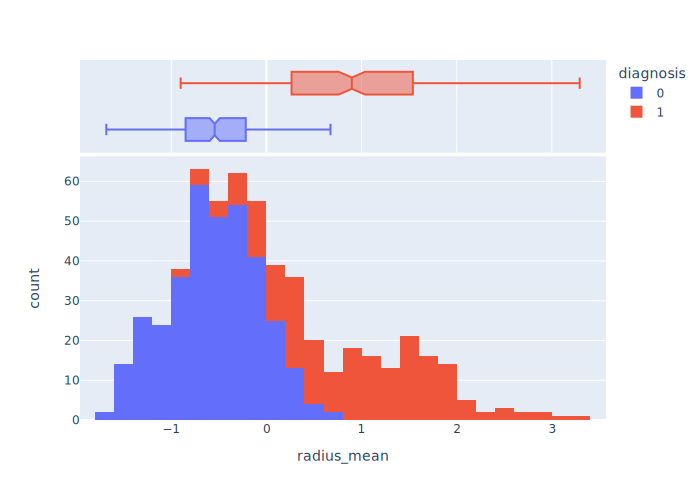

In [4]:
fig = px.histogram(df_mean_F, x='radius_mean', color="diagnosis", marginal="box",
                hover_data=df_mean_M.columns)
fig.show()

Outliers in radius_mean have been removed 

In [5]:
df_mean_B = df_mean_B[df_mean_B['texture_mean'] > -2.2]
df_mean_B = df_mean_B[df_mean_B['texture_mean'] < 1.4]

df_mean_M = df_mean_M[df_mean_M['texture_mean'] > -1.3]
df_mean_M = df_mean_M[df_mean_M['texture_mean'] < 2]

df_mean_F = pd.concat([df_mean_B,df_mean_M],axis=0,ignore_index=True)

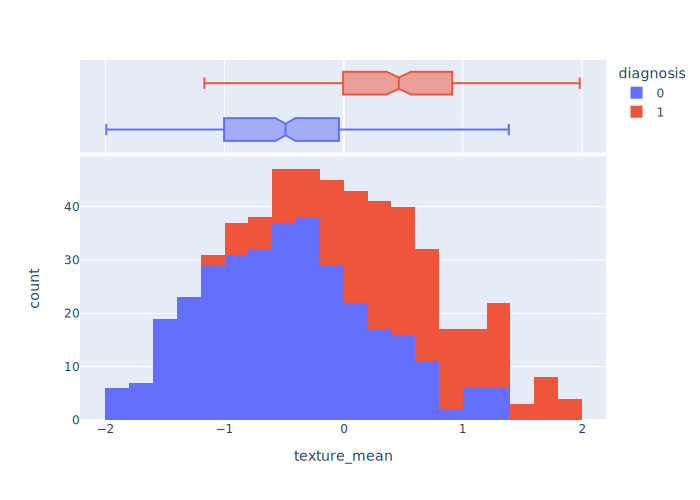

In [6]:
fig = px.histogram(df_mean_F, x='texture_mean', color="diagnosis", marginal="box",
                hover_data=df_mean_F.columns)
fig.show()

Outliers in texture_mean have been removed 

In [7]:
df_mean_B = df_mean_B[df_mean_B['perimeter_mean'] > -2]
df_mean_B = df_mean_B[df_mean_B['perimeter_mean'] < 0.5]

df_mean_M = df_mean_M[df_mean_M['perimeter_mean'] > -1]
df_mean_M = df_mean_M[df_mean_M['perimeter_mean'] < 3.5]

df_mean_F = pd.concat([df_mean_B,df_mean_M],axis=0,ignore_index=True)

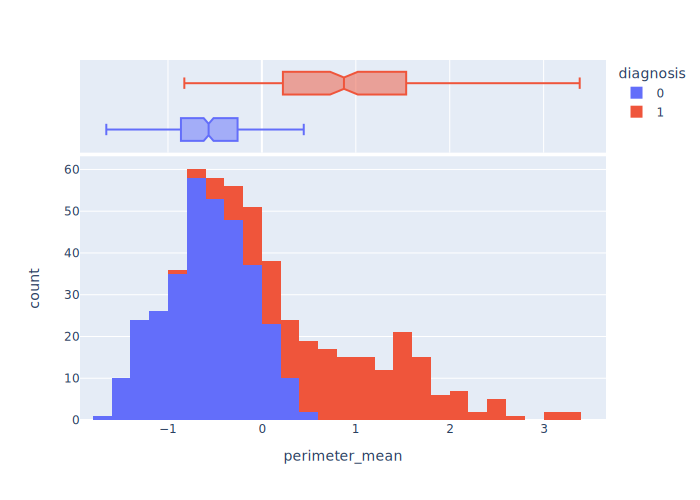

In [8]:
fig = px.histogram(df_mean_F, x='perimeter_mean', color="diagnosis", marginal="box",
                hover_data=df_mean_F.columns)
fig.show()

Outliers in perimeter_mean have been removed 

In [9]:
df_mean_B = df_mean_B[df_mean_B['area_mean'] > -1.5]
df_mean_B = df_mean_B[df_mean_B['area_mean'] < 0.5]

df_mean_M = df_mean_M[df_mean_M['area_mean'] > -1]
df_mean_M = df_mean_M[df_mean_M['area_mean'] < 3.5]

df_mean_F = pd.concat([df_mean_B,df_mean_M],axis=0,ignore_index=True)

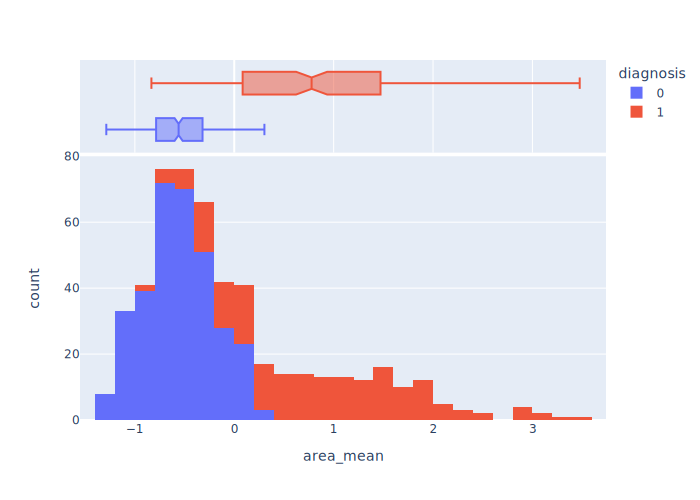

In [10]:
fig = px.histogram(df_mean_F, x='area_mean', color="diagnosis", marginal="box",
                hover_data=df_mean_F.columns)
fig.show()

Outliers in area_mean have been removed 

In [11]:
df_mean_B = df_mean_B[df_mean_B['smoothness_mean'] > -2.2]
df_mean_B = df_mean_B[df_mean_B['smoothness_mean'] < 2.2]

df_mean_M = df_mean_M[df_mean_M['smoothness_mean'] > -1.7]
df_mean_M = df_mean_M[df_mean_M['smoothness_mean'] < 2.5]

df_mean_F = pd.concat([df_mean_B,df_mean_M],axis=0,ignore_index=True)

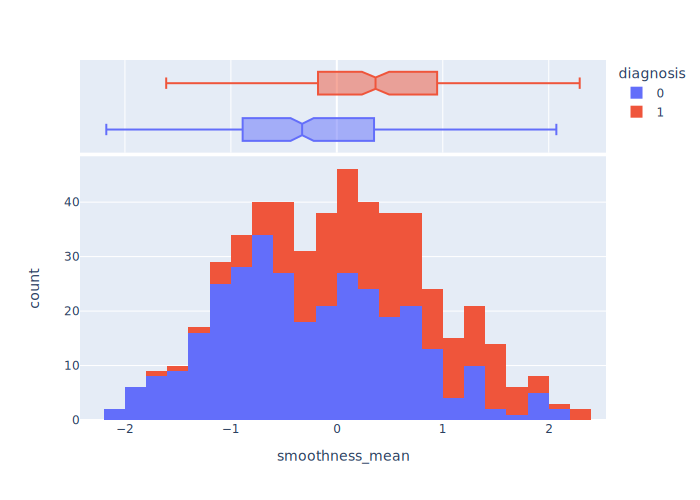

In [12]:
fig = px.histogram(df_mean_F, x='smoothness_mean', color="diagnosis", marginal="box",
                hover_data=df_mean_F.columns)
fig.show()

Outliers in smoothness_mean have been removed 

In [24]:
df_mean_B = df_mean_B[df_mean_B['compactness_mean'] > -1.5]
df_mean_B = df_mean_B[df_mean_B['compactness_mean'] < 1]

df_mean_M = df_mean_M[df_mean_M['compactness_mean'] > -1.1]
df_mean_M = df_mean_M[df_mean_M['compactness_mean'] < 2.2]

df_mean_F = pd.concat([df_mean_B,df_mean_M],axis=0,ignore_index=True)

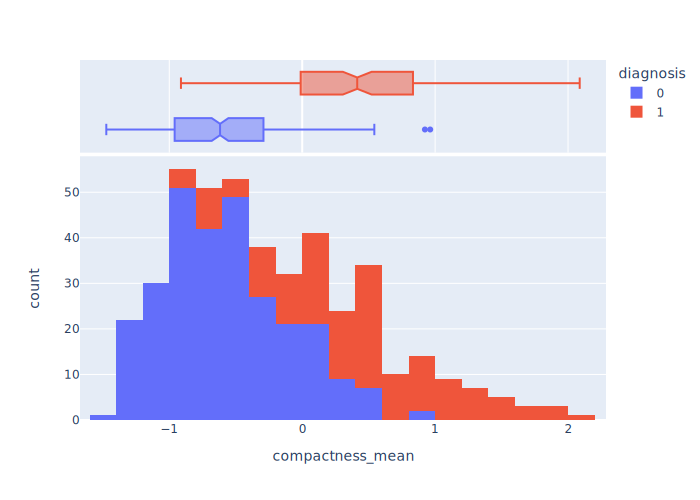

In [25]:
fig = px.histogram(df_mean_F, x='compactness_mean', color="diagnosis", marginal="box",
                hover_data=df_mean_F.columns)
fig.show()

Outliers in compactness_mean have been removed 

In [15]:
df_mean_B = df_mean_B[df_mean_B['concavity_mean'] > -1.2]
df_mean_B = df_mean_B[df_mean_B['concavity_mean'] < 0.2]

df_mean_M = df_mean_M[df_mean_M['concavity_mean'] > -0.8]
df_mean_M = df_mean_M[df_mean_M['concavity_mean'] < 3]

df_mean_F = pd.concat([df_mean_B,df_mean_M],axis=0,ignore_index=True)

outliers in convavity_mean have been removed 

In [16]:
df_mean_B = df_mean_B[df_mean_B['concave points_mean'] > -1.5]
df_mean_B = df_mean_B[df_mean_B['concave points_mean'] < 0]

df_mean_M = df_mean_M[df_mean_M['concave points_mean'] > -0.7]
df_mean_M = df_mean_M[df_mean_M['concave points_mean'] < 2.5]

df_mean_F = pd.concat([df_mean_B,df_mean_M],axis=0,ignore_index=True)

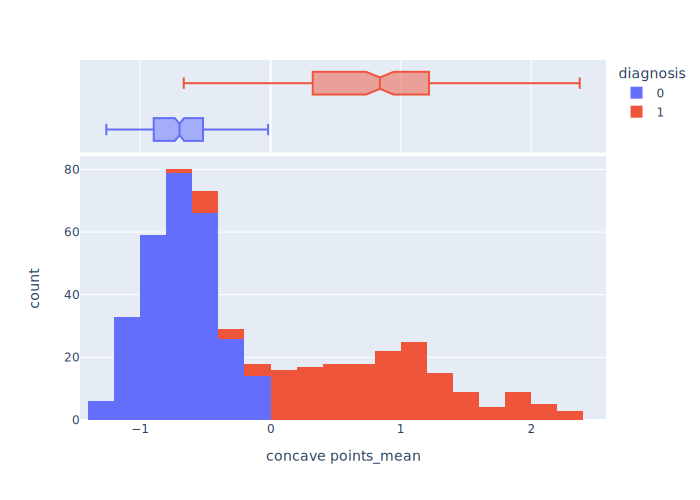

In [17]:
fig = px.histogram(df_mean_F, x='concave points_mean', color="diagnosis", marginal="box",
                hover_data=df_mean_F.columns)
fig.show()

outliers in concave points_mean have been removed

In [18]:
df_mean_B = df_mean_B[df_mean_B['symmetry_mean'] > -2.4]
df_mean_B = df_mean_B[df_mean_B['symmetry_mean'] < 3]

df_mean_M = df_mean_M[df_mean_M['symmetry_mean'] > -2.5]
df_mean_M = df_mean_M[df_mean_M['symmetry_mean'] < 1.3]

df_mean_F = pd.concat([df_mean_B,df_mean_M],axis=0,ignore_index=True)

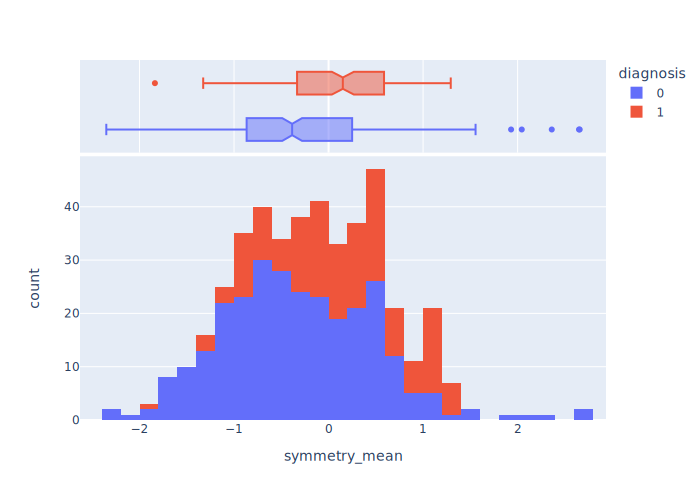

In [19]:
fig = px.histogram(df_mean_F, x='symmetry_mean', color="diagnosis", marginal="box",
                hover_data=df_mean_F.columns)
fig.show()